# Two-Body Problem Simulation Usage Example

This notebook demonstrates how to use the `orbit.py` module to simulate:
- Classical orbits
- Relativistic orbits
- Create visualizations and animations

Author: R.S.S.G

In [6]:
# Import necessary libraries
import sys
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display

# To use this notebook, we need to import orbit module
sys.path.append("../orbit")  # Go up one level
from orbit import TwoBodyProblem, RunIntegrator, Animation

# Set up output directory
output_dir = "example_outputs"
os.makedirs(output_dir, exist_ok=True)

## 1. Basic Classical Orbit Simulation

Let's start with a simple classical (non-relativistic) orbit.

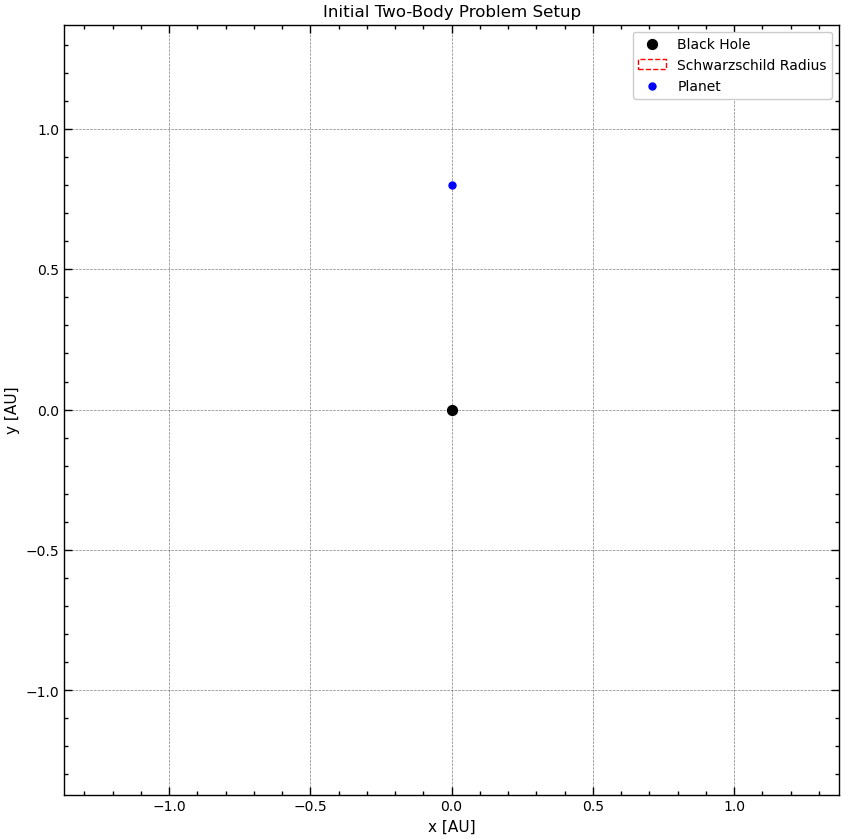

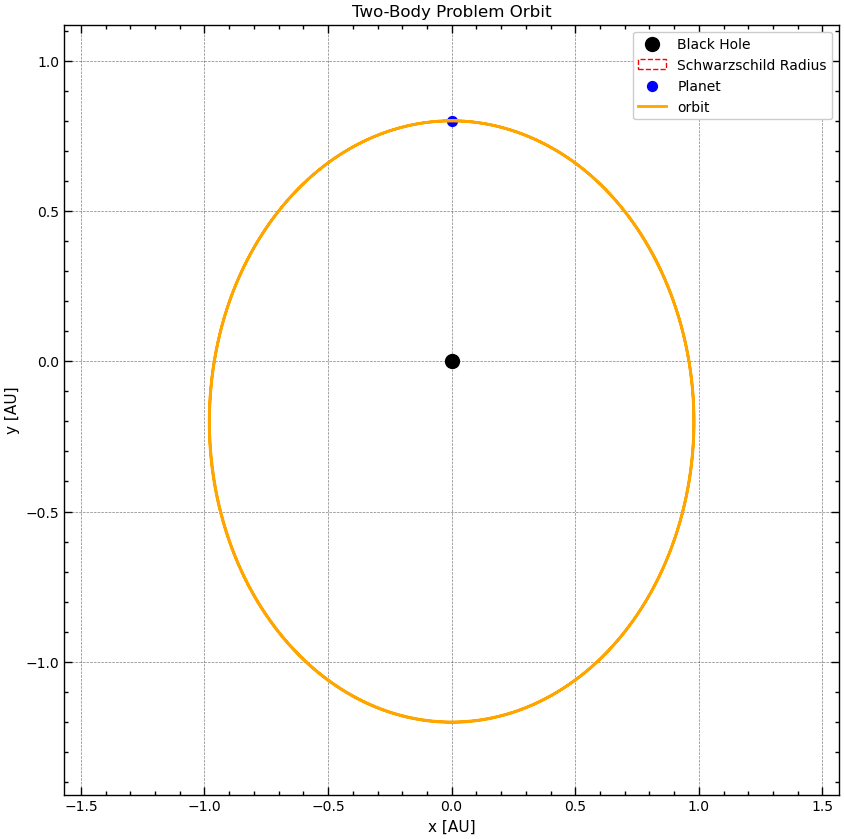

In [7]:
# Create a classical orbit (Earth-like parameters)
M = 1.0          # Solar masses (black hole mass)
a = 1.0          # AU (semi-major axis)
e = 0.2          # Eccentricity
N = 2            # Number of orbits to simulate

# Initialize the two-body system
classical_system = TwoBodyProblem(M, a, e)

# Plot initial configuration
classical_system.plot_grid("classical_init", output_dir)
display(Image(filename=f"{output_dir}/classical_init.png"))

# Run the simulation (using scipy integrator)
classical_result = RunIntegrator(
    N=N,
    correction=False,  # No relativistic correction
    dt=None,          # Automatic time step
    two_body_instance=classical_system,
    method="scipy",   # Using scipy's DOP853 integrator
    output_dir=output_dir,
    vtk_name="classical_orbit",
    orbit_plot_name="classical_orbit"
).run()

# Display the orbit plot
display(Image(filename=f"{output_dir}/classical_classical_orbit.png"))

## 2. Relativistic Orbit Simulation

Now let's simulate the same system but with relativistic corrections.
This is particularly important for orbits close to a massive black hole.

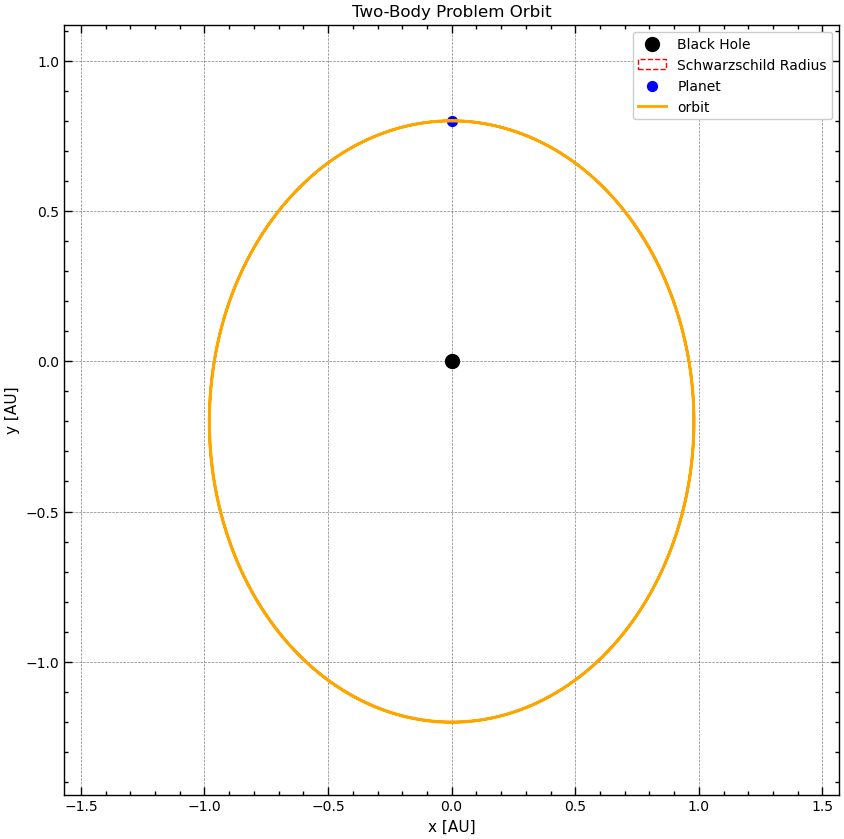

In [8]:
# Create a relativistic orbit (same parameters but with correction)
relativistic_result = RunIntegrator(
    N=N,
    correction=True,  # Enable relativistic correction
    dt=None,
    two_body_instance=classical_system,  # Same initial conditions
    method="scipy",
    output_dir=output_dir,
    vtk_name="relativistic_orbit",
    orbit_plot_name="relativistic_orbit"
).run()

# Display the orbit plot
display(Image(filename=f"{output_dir}/relativistic_relativistic_orbit.png"))


## 4. Creating an Animation

Let's create an animation of the relativistic orbit to better visualize the precession effect.


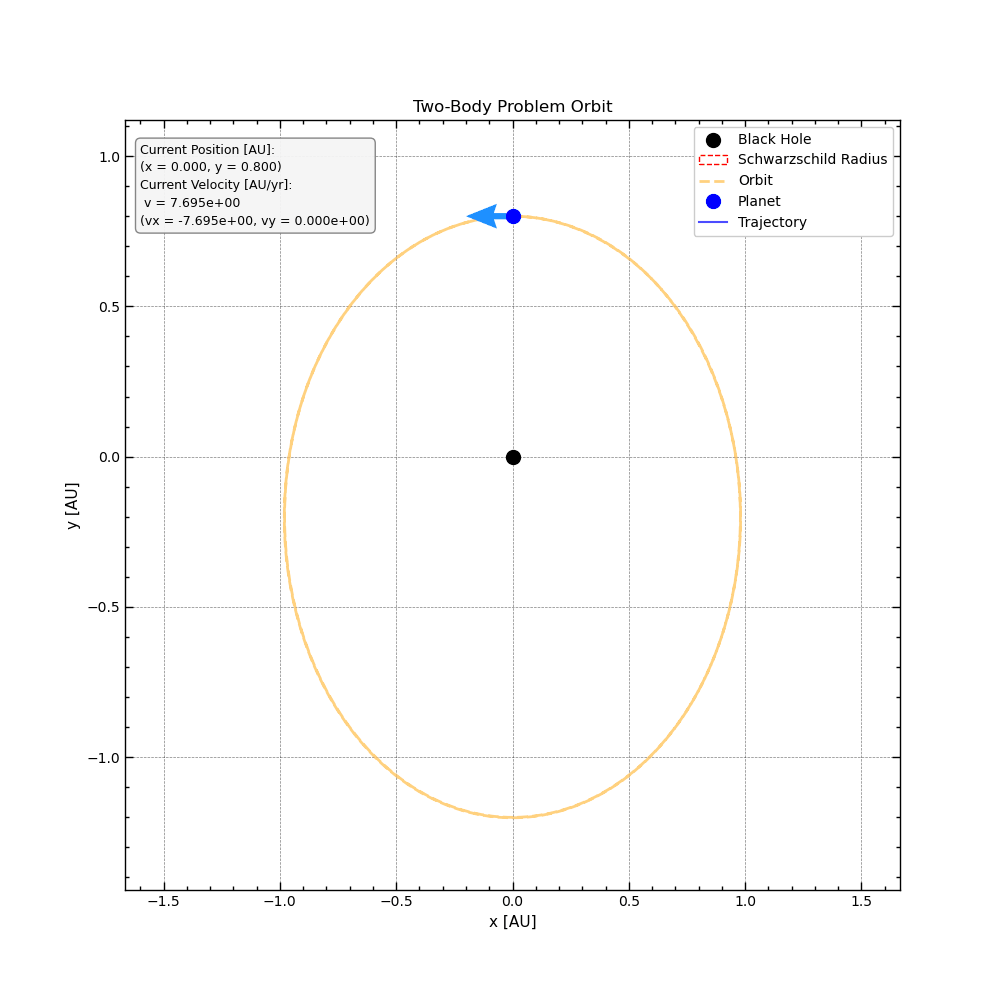

In [20]:
# Create animation from the saved VTK file
animation = Animation(
    orbit_file=f"{output_dir}/relativistic_orbit.vtk",
    output_dir=output_dir,
    animation_name="relativistic_orbit_animation",
    fps=30
)
animation.animate()

# Display the animation (in Jupyter this might show as a static image)
# In actual Jupyter notebook, you might use HTML display or FileLink
display(Image(filename=f"{output_dir}/relativistic_orbit_animation.gif"))

## 4. Extreme Relativistic Case

Let's simulate a more extreme case where relativistic effects are very pronounced.


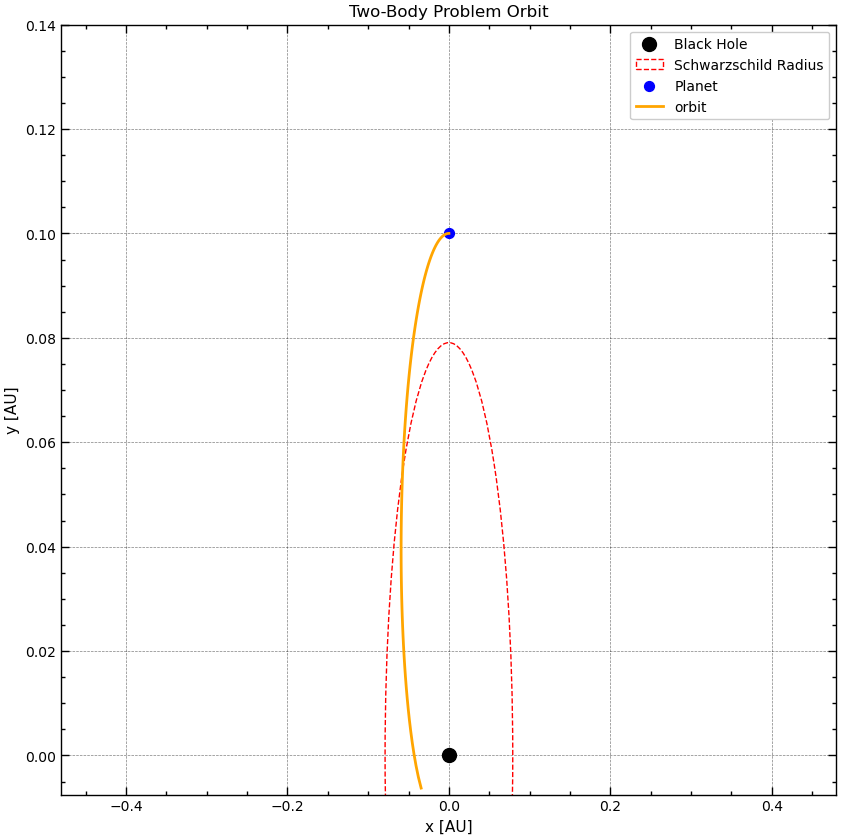

In [22]:
# Parameters for extreme case
M_extreme = 4e6  # Mass of Sgr A* in solar masses
a_extreme = 0.5  # Very close orbit (in AU)
e_extreme = 0.8   # High eccentricity

# Initialize system
extreme_system = TwoBodyProblem(M_extreme, a_extreme, e_extreme)

# Run relativistic simulation
extreme_result = RunIntegrator(
    N=1,
    correction=True,
    dt=None,
    two_body_instance=extreme_system,
    method="trapezoidal",
    output_dir=output_dir,
    vtk_name="extreme_orbit",
    orbit_plot_name="extreme_orbit"
).run()

# Display the orbit plot
display(Image(filename=f"{output_dir}/relativistic_extreme_orbit.png"))